Лучшее решение (x1, x2): [5.00000005 5.99999991]
Значение функции в лучшем решении: 1.7220885130720613e-14


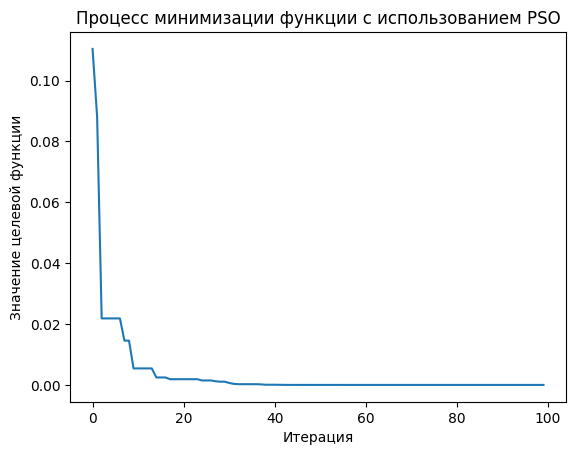

In [6]:
import numpy as np
import random

# Функция для минимизации
def fitness_function(x):
    x1, x2 = x
    return 4 * (x1 - 5) ** 2 + (x2 - 6) ** 2

# Инициализация параметров
def initialize_particles(pop_size, bounds):
    particles = [np.random.uniform(bounds[0], bounds[1], len(bounds)) for _ in range(pop_size)]
    velocities = [np.random.uniform(-1, 1, len(bounds)) for _ in range(pop_size)]
    personal_best = particles.copy()
    personal_best_values = [fitness_function(p) for p in particles]
    return particles, velocities, personal_best, personal_best_values

# Алгоритм PSO
def particle_swarm_optimization(pop_size, bounds, generations, inertia, cognitive, social):
    particles, velocities, personal_best, personal_best_values = initialize_particles(pop_size, bounds)
    global_best = min(personal_best, key=fitness_function)
    global_best_value = fitness_function(global_best)

    history = []

    for _ in range(generations):
        for i in range(pop_size):
            # Обновление скорости
            r1, r2 = random.random(), random.random()
            velocities[i] = (inertia * velocities[i] +
                             cognitive * r1 * (personal_best[i] - particles[i]) +
                             social * r2 * (global_best - particles[i]))

            # Обновление позиции
            particles[i] = np.clip(particles[i] + velocities[i], bounds[0], bounds[1])

            # Обновление персонального лучшего
            fitness = fitness_function(particles[i])
            if fitness < personal_best_values[i]:
                personal_best[i] = particles[i]
                personal_best_values[i] = fitness

            # Обновление глобального лучшего
            if fitness < global_best_value:
                global_best = particles[i]
                global_best_value = fitness

        history.append(global_best_value)

    return global_best, global_best_value, history

# Параметры PSO
bounds = [-10, 10]
pop_size = 30
generations = 100
inertia = 0.7
cognitive = 1.5
social = 2.0

# Запуск PSO
best_solution, best_fitness, history = particle_swarm_optimization(pop_size, bounds, generations, inertia, cognitive, social)

print("Лучшее решение (x1, x2):", best_solution)
print("Значение функции в лучшем решении:", best_fitness)

# График значений функции на каждой итерации
import matplotlib.pyplot as plt

plt.plot(range(generations), history)
plt.xlabel("Итерация")
plt.ylabel("Значение целевой функции")
plt.title("Процесс минимизации функции с использованием PSO")
plt.show()
